In [1]:
from collections import deque
import random

class ReplayBuffer(object):

    def __init__(self, buffer_size):
        self.buffer_size = buffer_size #maximum size of replaybuffer
        self.num_experiences = 0 #experiences
        self.buffer = deque() #deque

    def getBatch(self, batch_size):
        # Randomly sample batch_size and returns, 
        #if replay buffer doesnt have as many experiences as needed a random sample of num.experinece is returned
        if self.num_experiences < batch_size:
            return random.sample(self.buffer, self.num_experiences)
        else:
            return random.sample(self.buffer, batch_size)

    def size(self): #function that returns maximum size of 
        return self.buffer_size
    
    #function to add experiences
    def add(self, state, action, reward, new_state, done, adjacency):
        experience = (state, action, reward, new_state, done, adjacency)
        if self.num_experiences < self.buffer_size:
            self.buffer.append(experience)
            self.num_experiences += 1
        else:
            self.buffer.popleft()
            self.buffer.append(experience)

    #returns no of experience currently the buffer has saved
    def count(self):
        return self.num_experiences
    
    #erases the buffer completely
    def erase(self):
        self.buffer = deque()
        self.num_experiences = 0

In [2]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import math

np.random.seed(476)
np.__version__

import sys
print(sys.version)

Using TensorFlow backend.


3.7.16 (default, Jan 17 2023, 16:06:28) [MSC v.1916 64 bit (AMD64)]


In [3]:
class Router(object):
  def __init__(self,x,y):
    self.x = x
    self.y = y
    self.neighbor = []
    self.edge = []

class Edge(object):
  def __init__(self,x,y,l):
    self.start = x
    self.end = y
    self.len = int(int(l*10)/2+1)
    self.load = 0

class Data(object):
  def __init__(self,x,y,size,priority):
    self.now = x
    self.target = y
    self.size = size
    self.priority = priority
    self.time = 0
    self.edge = -1
    self.neigh = [priority,-1,-1,-1]


router = []
edges = []
t_edge = 0 ##keeps tracks of the number of edges in the graph
n_router = 25

0 0
0.25 0
0.5 0
0.75 0
1.0 0
0 0.25
0.25 0.25
0.5 0.25
0.75 0.25
1.0 0.25
0 0.5
0.25 0.5
0.5 0.5
0.75 0.5
1.0 0.5
0 0.75
0.25 0.75
0.5 0.75
0.75 0.75
1.0 0.75
0 1.0
0.25 1.0
0.5 1.0
0.75 1.0
1.0 1.0


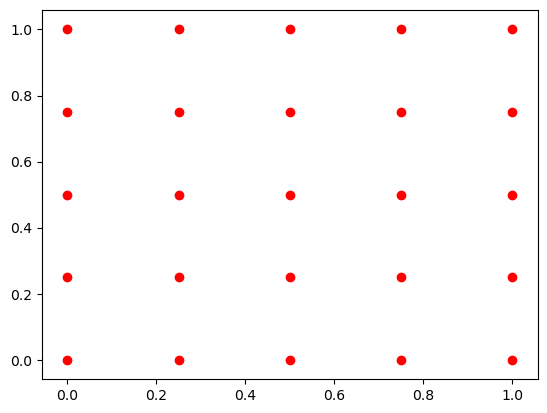

In [4]:
#Router Topology (Router Positions)
#Router Topology (Router Positions)
y_coordinate = 0
x_coordinate = 0
x_increment = 0.25
y_increment = 0.25
x_max = 1
y_max = float('inf')  # Assuming there's no maximum y-coordinate

for i in range(n_router):
    router.append(Router(x_coordinate, y_coordinate))
    x_coordinate += x_increment
    if x_coordinate > x_max:
        x_coordinate = 0
        y_coordinate += y_increment

for i in range(n_router):
	print(router[i].x,router[i].y)
	plt.scatter(router[i].x, router[i].y, color = 'red')
plt.show() 

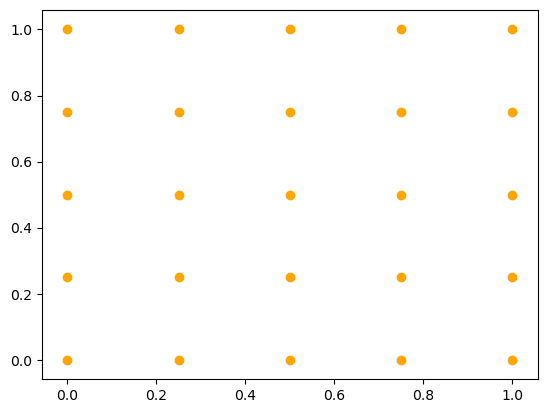

In [5]:
for i in range(n_router):
    dis = []
    for j in range(n_router):
        dis.append([(router[j].x - router[i].x)**2 + (router[j].y - router[i].y)**2, j])
    dis.sort(key = lambda x: x[0],reverse = False)

    for j in range(n_router):
        if(j==i):
            continue
    else:
        if(dis[j][0] == 0.0625):
            if dis[j][1] not in router[i].neighbor:
                
                router[i].neighbor.append(dis[j][1])
                router[dis[j][1]].neighbor.append(i)
            if i<dis[j][1]:
                edges.append(Edge(i,dis[j][1],np.sqrt(dis[j][0])))
                router[i].edge.append(t_edge)
                router[dis[j][1]].edge.append(t_edge)
                t_edge += 1
            else:
                edges.append(Edge(dis[j][1],i,np.sqrt(dis[j][0])))
                router[dis[j][1]].edge.append(t_edge)
                router[i].edge.append(t_edge)
                t_edge += 1

for i in range(n_router):
        plt.scatter(router[i].x, router[i].y, color = 'orange')
for e in edges:
    plt.plot([router[e.start].x,router[e.end].x],[router[e.start].y,router[e.end].y],color='black')

In [6]:
print("total no of edges: ",t_edge)
for i in range(n_router):
    print("Router {}: x = {} y = {} neighbor = {} edges = {}".format(i,router[i].x,router[i].y,router[i].neighbor,router[i].edge))
for i in range(t_edge):
    print("Edge {}: start_point = {} end_point = {} length = {}".format(i,edges[i].start,edges[i].end,edges[i].len))

total no of edges:  0
Router 0: x = 0 y = 0 neighbor = [] edges = []
Router 1: x = 0.25 y = 0 neighbor = [] edges = []
Router 2: x = 0.5 y = 0 neighbor = [] edges = []
Router 3: x = 0.75 y = 0 neighbor = [] edges = []
Router 4: x = 1.0 y = 0 neighbor = [] edges = []
Router 5: x = 0 y = 0.25 neighbor = [] edges = []
Router 6: x = 0.25 y = 0.25 neighbor = [] edges = []
Router 7: x = 0.5 y = 0.25 neighbor = [] edges = []
Router 8: x = 0.75 y = 0.25 neighbor = [] edges = []
Router 9: x = 1.0 y = 0.25 neighbor = [] edges = []
Router 10: x = 0 y = 0.5 neighbor = [] edges = []
Router 11: x = 0.25 y = 0.5 neighbor = [] edges = []
Router 12: x = 0.5 y = 0.5 neighbor = [] edges = []
Router 13: x = 0.75 y = 0.5 neighbor = [] edges = []
Router 14: x = 1.0 y = 0.5 neighbor = [] edges = []
Router 15: x = 0 y = 0.75 neighbor = [] edges = []
Router 16: x = 0.25 y = 0.75 neighbor = [] edges = []
Router 17: x = 0.5 y = 0.75 neighbor = [] edges = []
Router 18: x = 0.75 y = 0.75 neighbor = [] edges = []
R

In [7]:
data = []
n_data = 20
for i in range(n_data):
  data.append(Data(np.random.randint(n_router),np.random.randint(n_router),np.random.random(),i))
#Priority has been passed according to order of creation

for i in range(n_data):
  print("Data Packet {}: start_point = {}, target  ={}, size = {}, priority = {}".format(i,data[i].now,data[i].target,data[i].size,data[i].priority))
    

Data Packet 0: start_point = 23, target  =22, size = 0.346225131531554, priority = 0
Data Packet 1: start_point = 20, target  =20, size = 0.003956348007303712, priority = 1
Data Packet 2: start_point = 13, target  =11, size = 0.814600768961296, priority = 2
Data Packet 3: start_point = 15, target  =1, size = 0.19120860415911356, priority = 3
Data Packet 4: start_point = 24, target  =18, size = 0.712725239895066, priority = 4
Data Packet 5: start_point = 17, target  =14, size = 0.6423568433363959, priority = 5
Data Packet 6: start_point = 24, target  =21, size = 0.24940574738844146, priority = 6
Data Packet 7: start_point = 12, target  =17, size = 0.44820512956768666, priority = 7
Data Packet 8: start_point = 14, target  =20, size = 0.9590897908468766, priority = 8
Data Packet 9: start_point = 20, target  =24, size = 0.7206297904058143, priority = 9
Data Packet 10: start_point = 1, target  =16, size = 0.9978962527412192, priority = 10
Data Packet 11: start_point = 1, target  =22, size =

In [8]:
path = [[] for _ in range(n_data)]
print(path)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


In [9]:
for i in range(n_data):
    path[i].append("Start:"+str(data[i].now))
print(path)

[['Start:23'], ['Start:20'], ['Start:13'], ['Start:15'], ['Start:24'], ['Start:17'], ['Start:24'], ['Start:12'], ['Start:14'], ['Start:20'], ['Start:1'], ['Start:1'], ['Start:0'], ['Start:6'], ['Start:20'], ['Start:4'], ['Start:17'], ['Start:19'], ['Start:16'], ['Start:16']]


In [10]:
def observation(router, edges, data, n_router, n_data, t_edge):
	obs = []
	for i in range(n_data):
		ob=[]

		####meta information####
		ob.append(data[i].now)
		ob.append(data[i].target)
		ob.append(data[i].edge)
		ob.append(data[i].size)
		ob.append(data[i].priority)

		####edge information####
		edge_count=0
		for j in router[data[i].now].edge:
			edge_count+=1
			ob.append(j)
			ob.append(edges[j].start)
			ob.append(edges[j].end)
			ob.append(edges[j].len)
			ob.append(edges[j].load)
		for j in range(4-edge_count): ####
			for k in range(5): ####
				ob.append(-1) #invalid placeholder  ####      
        
		####other datas####
		count =0;
		data[i].neigh = []
		data[i].neigh.append(i)

		for j in range(n_data):
			if j==i:
				continue
			if (data[j].now in router[data[i].now].neighbor)|(data[j].now == data[i].now):
				count+=1
				ob.append(data[j].now)
				ob.append(data[j].target)
				ob.append(data[j].edge)
				ob.append(data[j].size)
				ob.append(data[i].priority)
				data[i].neigh.append(j)

			if count==3:
				break
		for j in range(3-count):
			data[i].neigh.append(-1)
			for k in range(5):
				ob.append(-1) #invalid placeholder

		obs.append(np.array(ob))
	return obs



In [11]:

def set_action(act, edges, data, n_data, t_edge, faulty_edges):
    reward = [0] * n_data
    done = [False] * n_data

    for i in range(n_data):
        print(f"Packet {i}: Current Position - {data[i].now}, Target - {data[i].target}, Done - {done[i]}")
        # Handling data packets on edges
        if data[i].edge != -1:
            data[i].time -= 1
            if data[i].time == 0:
                edges[data[i].edge].load -= data[i].size
                data[i].edge = -1

        # Handling no action
        elif act[i] == 0:
            continue

        # Penalty for invalid action
        elif len(router[data[i].now].edge) <= act[i] - 1:
            reward[i] = -1.0
            continue

        # Handling valid actions
        else:
            t = router[data[i].now].edge[act[i] - 1]
            if edges[t].load + data[i].size > 1:
                reward[i] = -1.0  # Penalty for overload
            else:
                data[i].edge = t
                data[i].time = edges[t].len
                edges[t].load += data[i].size
                if edges[t].start == data[i].now:
                    data[i].now = edges[t].end
                else:
                    data[i].now = edges[t].start
                path[i].append(data[i].now)
                reward[i] = 2.0  # Reward for successful step
                if t in faulty_edges:
                    reward[i] -= 5.0  # Penalty for landing on a faulty edge

        # Reward for reaching the target
        if data[i].now == data[i].target:
            reward[i] = 5.0
            path[i].append("target:" + str(data[i].now))
            done[i] = True

    return data, edges, reward, done



In [12]:
import os, sys, time
from keras import backend as K
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import random
from ReplayBuffer_v2 import ReplayBuffer
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Input, Lambda, Flatten, TimeDistributed, Concatenate
from tensorflow.keras.layers import Add, Reshape, MaxPooling2D, Concatenate, Embedding, RepeatVector
from tensorflow.keras.models import Model
from keras.layers.core import Activation
from keras.utils import np_utils,to_categorical
from keras.engine.topology import Layer
from tensorflow.keras.utils import plot_model

neighbors = 4
len_feature = 40 #length of observation array
action_space = 5 #maximum possible actions, 5 for 4 edges+1 no action

#Does a one hot encoding of all the neighbouring data
def Adjacency(data,n_data):
	adj = []
	for j in range(n_data):
		l = to_categorical(data[j].neigh,num_classes=n_data)
		for i in range(4):
			if data[j].neigh[i] == -1:
				l[i]=np.zeros(n_data)
		adj.append(l)
	return adj

#multilayer perceptron that takes the input of shape [none,len_feature] and converts it into shape [none,1,128]
def MLP():
	In_0 = Input(shape=[len_feature])
	h = Dense(128, activation='relu',kernel_initializer='random_normal')(In_0)
	h = Dense(128, activation='relu',kernel_initializer='random_normal')(h)
	h = Reshape((1,128))(h)
	model = Model(In_0,h)
	return model


#function generates 2 multiheadattention model and returns then as model and model_
def MultiHeadsAttModel(l=2, d=128, dv=16, dout=128, nv = 8 ):

	v1 = Input(shape = (l, d))
	q1 = Input(shape = (l, d))
	k1 = Input(shape = (l, d))
	ve = Input(shape = (1, l))

	v2 = Dense(dv*nv, activation = "relu",kernel_initializer='random_normal')(v1)
	q2 = Dense(dv*nv, activation = "relu",kernel_initializer='random_normal')(q1)
	k2 = Dense(dv*nv, activation = "relu",kernel_initializer='random_normal')(k1)

	v = Reshape((l, nv, dv))(v2)
	q = Reshape((l, nv, dv))(q2)
	k = Reshape((l, nv, dv))(k2)
	v = Lambda(lambda x: K.permute_dimensions(x, (0,2,1,3)))(v)
	k = Lambda(lambda x: K.permute_dimensions(x, (0,2,1,3)))(k)
	q = Lambda(lambda x: K.permute_dimensions(x, (0,2,1,3)))(q)

	att = Lambda(lambda x: K.batch_dot(x[0],x[1] ,axes=[3,3]) / np.sqrt(dv))([q,k])# l, nv, nv
	att_ = Lambda(lambda x: K.softmax(x))(att)
	out = Lambda(lambda x: K.batch_dot(x[0], x[1],axes=[3,2]))([att, v])
	out = Lambda(lambda x: K.permute_dimensions(x, (0,2,1,3)))(out)

	out = Reshape((l, dv*nv))(out)

	T = Lambda(lambda x: K.batch_dot(x[0],x[1]))([ve,out])

	out = Dense(dout, activation = "relu",kernel_initializer='random_normal')(T)
	model = Model([q1,k1,v1,ve], out)
	model_ = Model([q1,k1,v1,ve],att_)
	return model,model_


#concatenates the input layers and passes it through a dense layer
def Q_Net(action_dim):

	I1 = Input(shape = (1, 128))
	I2 = Input(shape = (1, 128))
	I3 = Input(shape = (1, 128))

	h1 = Flatten()(I1)
	h2 = Flatten()(I2)
	h3 = Flatten()(I3)

	h = Concatenate()([h1,h2,h3])
	V = Dense(action_dim,kernel_initializer='random_normal')(h)

	model = Model([I1,I2,I3],V)
	return model



In [13]:
#faulty_router = []
#num = int(input("Enter the number of faulty routers: "))  # Convert input to integer
#for i in range(0, num):
#    faulty = int(input("Enter the faulty router number: "))
#    faulty_router.append(faulty)
#print("The faulty routers are: ", faulty_router)


In [14]:
faulty_edges = []
num = int(input("Enter the number of faulty edges: "))  # Convert input to integer
if num!=0:
    for i in range(0, num):
        faulty = int(input("Enter the faulty edge number: "))
        faulty_edges.append(faulty)
print("The faulty edges are: ", faulty_edges)


Enter the number of faulty edges: 2
Enter the faulty edge number: 4
Enter the faulty edge number: 8
The faulty edges are:  [4, 8]


In [15]:
######build the model#########
encoder = MLP()
m1, m1_r = MultiHeadsAttModel(l=neighbors) #neighbours for context analysis using a transformer
m2, m2_r = MultiHeadsAttModel(l=neighbors)
q_net = Q_Net(action_dim = action_space) #maximum possible actions that can be taken
vec = np.zeros((1,neighbors)) 
vec[0][0] = 1
#array([[1., 0., 0., 0.]])


In= []
for j in range(n_data):
	In.append(Input(shape=[len_feature]))
	In.append(Input(shape=(neighbors,n_data))) #4,20
In.append(Input(shape=(1,neighbors)))
feature = []
for j in range(n_data):
	feature.append(encoder(In[j*2]))  #observation vector is passed first through a encoder (MLP)

feature_ = Concatenate(axis=1)(feature) #[none,1,128] output shape of encoder concatenated along the columns

relation1 = []
for j in range(n_data):
	T = Lambda(lambda x: K.batch_dot(x[0],x[1]))([In[j*2+1],feature_]) #batch dot product is done between feature vector containing encoded observation and input layer of shape(4,20)
	relation1.append(m1([T,T,T,In[n_data*2]])) #passed to one of the attention models

relation1_ = Concatenate(axis=1)(relation1)

relation2 = []
for j in range(n_data):
	T = Lambda(lambda x: K.batch_dot(x[0],x[1]))([In[j*2+1],relation1_])
	relation2.append(m2([T,T,T,In[n_data*2]]))

V = []
for j in range(n_data):
	V.append(q_net([feature[j],relation1[j],relation2[j]]))

model = Model(In,V)
model.compile(optimizer=Adam(lr = 0.0001), loss='mse')
plot_model(model, to_file='model.png', show_shapes=True)
#model compiled to an output layer that gives out 20 outputs of size action_space

######build the target model#########
encoder_t = MLP()
m1_t, _ = MultiHeadsAttModel(l=neighbors)
m2_t, _ = MultiHeadsAttModel(l=neighbors)
q_net_t = Q_Net(action_dim = action_space)
In_t= []
for j in range(n_data):
	In_t.append(Input(shape=[len_feature]))
	In_t.append(Input(shape=(neighbors,n_data)))
In_t.append(Input(shape=(1,neighbors)))

feature_t = []
for j in range(n_data):
	feature_t.append(encoder_t(In_t[j*2]))

feature_t_ = Concatenate(axis=1)(feature_t)

relation1_t = []
for j in range(n_data):
	T = Lambda(lambda x: K.batch_dot(x[0],x[1]))([In_t[j*2+1],feature_t_])
	relation1_t.append(m1_t([T,T,T,In_t[n_data*2]]))

relation1_t_ = Concatenate(axis=1)(relation1_t)

relation2_t = []
for j in range(n_data):
	T = Lambda(lambda x: K.batch_dot(x[0],x[1]))([In_t[j*2+1],relation1_t_])
	relation2_t.append(m2_t([T,T,T,In_t[n_data*2]]))

V_t = []
for j in range(n_data):
	V_t.append(q_net_t([feature_t[j],relation1_t[j],relation2_t[j]]))

model_t = Model(In_t,V_t)

#########for regular###############
Inr= []
for j in range(n_data):
    Inr.append(Input(shape=[len_feature]))
    Inr.append(Input(shape=(neighbors,n_data)))
Inr.append(Input(shape=(1,neighbors)))
featurer = []
for j in range(n_data):
    featurer.append(encoder(Inr[j*2]))

featurer_ = Concatenate(axis=1)(featurer)

relationr1 = []
r2=[]
for j in range(n_data):
    T = Lambda(lambda x: K.batch_dot(x[0],x[1]))([Inr[j*2+1],featurer_])
    relationr1.append(m1([T,T,T,Inr[n_data*2]]))

relationr1_ = Concatenate(axis=1)(relationr1)

for j in range(n_data):
    T = Lambda(lambda x: K.batch_dot(x[0],x[1]))([Inr[j*2+1],relationr1_])
    r2.append(m2_r([T,T,T,Inr[n_data*2]]))

model_r=Model(Inr,r2)
model_r.compile(optimizer=Adam(lr = 0.0005), loss='kullback_leibler_divergence')

capacity = 200000
TAU = 0.01
alpha = 0.7
GAMMA = 0.98
episode_before_train = 10000
i_episode = 0 #counter for episodes
mini_batch = 10
loss,score = 0,0
num = 0
times = [0]*n_data #[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
total_time = 0
buff=ReplayBuffer(capacity)
f = open('log_router_gqn.txt','w')
tempbool = False;
#########playing#########
while(1):

	i_episode+=1	
#	print()    
#	print(i_episode)
	if(i_episode==1001):
		break
	for i in range(n_data):
		times[i] = times[i] + 1
		if data[i].now == data[i].target:
			num+=1 #increments under successfull routing
			data[i].now = np.random.randint(n_router)
			path[i].append("start :"+str(data[i].now)) 
			data[i].target = np.random.randint(n_router)
			data[i].time = 0
			if data[i].edge != -1:
				edges[data[i].edge].load -= data[i].size
			data[i].size = np.random.rand()
			data[i].edge = -1
			total_time+=times[i]
			times[i] = 0 #set to 0 after total time has been saved and new data packet is generated

	obs = observation(router, edges, data, n_router, n_data, t_edge)
	#obs is a list of lists, each list inside having length of len_features    
	adj = Adjacency(data,n_data) #returns one hot encoded vector shape(20,4,20)

	ob=[]
	for j in range(n_data):
		ob.append(np.asarray([obs[j]]))
		ob.append(np.asarray([adj[j]]))
	ob.append(np.asarray([vec]))
	action = model.predict(ob)
# 	if tempbool!=True:
# 		print(action)
	act = np.zeros(n_data,dtype = np.int32)
	for j in range(n_data):
		if np.random.rand()<alpha:
			act[j]=random.randrange(action_space)
		else:
			act[j]=np.argmax(action[j])
	
# 		print("Printing act matrix") 
# 		print(act)
#		tempbool=True
    
    
	data, edges, reward, done = set_action(act,edges, data, n_data, t_edge,faulty_edges)
	next_obs = observation(router, edges, data, n_router, n_data, t_edge)

	buff.add(obs, act, next_obs, reward, done, adj) #Experience added to buffer

	score += sum(reward)
	if i_episode %100 ==0:
# 		for temp in range(n_data):
# 			print(path[temp]) 
		print(int(i_episode/100))
		print("Average Reward/episode",score/100,end='\t')
		f.write(str(score/100)+'\t')
		if num !=0:
			print("Average episodes for routing packets:",100/(num),end='\t')
			f.write(str(total_time/num)+'\t')
		else :
			print(0,end='\t')
			f.write(str(0)+'\t')
		print("Number of packets Routed in 100 episodes",num,end='\t')
		print("Average Loss/Episode:",loss/100)
		f.write(str(num)+'\t'+str(loss/100)+'\n')
		loss = 0
		score = 0
		num = 0
		total_time = 0
		alpha*=0.996
		if alpha<0.01:
			alpha=0.01

	if i_episode < episode_before_train:
		continue

	#########training#########
	batch = buff.getBatch(mini_batch)
	states,actions,rewards,new_states,dones,adj=[],[],[],[],[],[]
	for i_ in  range(n_data*2+1):
		states.append([])
		new_states.append([])
	for e in batch:
		for j in range(n_data):
			states[j*2].append(e[0][j])
			states[j*2+1].append(e[5][j])
			new_states[j*2].append(e[2][j])
			new_states[j*2+1].append(e[5][j])
		states[n_data*2].append(vec)
		new_states[n_data*2].append(vec)
		actions.append(e[1])
		rewards.append(e[3])
		dones.append(e[4])
		
	actions = np.asarray(actions)
	rewards = np.asarray(rewards)
	dones = np.asarray(dones)
		
	for i_ in  range(n_data*2+1):
		states[i_]=np.asarray(states[i_])
		new_states[i_]=np.asarray(new_states[i_])

	q_values = model.predict(states)
	target_q_values = model_t.predict(new_states)
	relation_presentation = model_r.predict(new_states)
	for k in range(len(batch)):
		for j in range(n_data):
			if dones[k][j]:
				q_values[j][k][actions[k][j]] = rewards[k][j]
			else:
				q_values[j][k][actions[k][j]] = rewards[k][j] + GAMMA*np.max(target_q_values[j][k])

	history=model.fit(states, q_values, epochs=1, batch_size=10, verbose=0)
	model_r.fit(states, relation_presentation, epochs=1, verbose=0)
	his=0
	for (k,v) in history.history.items():
		his+=v[0]
	loss+=(his/n_data)

	#########training target model#########
	weights = encoder.get_weights()
	target_weights = encoder_t.get_weights()
	for w in range(len(weights)):
		target_weights[w] = TAU * weights[w] + (1 - TAU)* target_weights[w]
	encoder_t.set_weights(target_weights)

	weights = q_net.get_weights()
	target_weights = q_net_t.get_weights()
	for w in range(len(weights)):
		target_weights[w] = TAU * weights[w] + (1 - TAU)* target_weights[w]
	q_net_t.set_weights(target_weights)

	weights = m1.get_weights()
	target_weights = m1_t.get_weights()
	for w in range(len(weights)):
		target_weights[w] = TAU * weights[w] + (1 - TAU)* target_weights[w]
	m1_t.set_weights(target_weights)

	weights = m2.get_weights()
	target_weights = m2_t.get_weights()
	for w in range(len(weights)):
		target_weights[w] = TAU * weights[w] + (1 - TAU)* target_weights[w]
	m2_t.set_weights(target_weights)
	
	model.save('dgn.h5')

	
	
# 	for i in range(n_router):
# 		plt.scatter(router[i].x, router[i].y, color = 'red')
# 	for e in edges:
# 		plt.plot([router[e.start].x,router[e.end].x],[router[e.start].y,router[e.end].y],color='black')
	
# 	for i in range(n_data):
# 		if data[i].edge != -1:
# 			plt.scatter((router[edges[data[i].edge].start].x + router[edges[data[i].edge].end].x)/2, (router[edges[data[i].edge].start].y + router[edges[data[i].edge].end].y)/2, color = 'green')
# 			plt.text((router[edges[data[i].edge].start].x + router[edges[data[i].edge].end].x)/2, (router[edges[data[i].edge].start].y + router[edges[data[i].edge].end].y)/2, s = str(i),fontsize = 10)
# 		else :
# 			plt.scatter(router[data[i].now].x, router[data[i].now].y, color = 'green')
# 			plt.text(router[data[i].now].x, router[data[i].now].y, s = str(i),fontsize = 10)
# 	plt.ion()
# 	plt.pause(0.1)
# 	plt.close()
	

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Packet 0: Current Position - 23, Target - 22, Done - False
Packet 1: Current Position - 9, Target - 10, Done - False
Packet 2: Current Position - 13, Target - 11, Done - False
Packet 3: Current Position - 15, Target - 1, Done - False
Packet 4: Current Position - 24, Target - 18, Done - False
Packet 5: Current Position - 17, Target - 14, Done - False
Packet 6: Current Position - 24, Target - 21, Done - False
Packet 7: Current Position - 12, Target - 17, Done - False
Packet 8: Current Position - 14, Target - 20, Done - False
Packet 9: Current Position - 20, Target - 24, Done - False
Packet 10: Current Position - 1, Target - 16, Done - False
Packet 11: Current Position - 1, Target - 22, Done - False
Packet 12: Current Position - 0, Target - 3, Done - False
Packet 13: Current Position - 6, Target - 9, Done - False
Packet 14: Current Position - 20, Target - 18, Done - False
Packet 15: Current Position - 4,

Packet 0: Current Position - 23, Target - 22, Done - False
Packet 1: Current Position - 9, Target - 10, Done - False
Packet 2: Current Position - 13, Target - 11, Done - False
Packet 3: Current Position - 15, Target - 1, Done - False
Packet 4: Current Position - 24, Target - 18, Done - False
Packet 5: Current Position - 17, Target - 14, Done - False
Packet 6: Current Position - 24, Target - 21, Done - False
Packet 7: Current Position - 12, Target - 17, Done - False
Packet 8: Current Position - 14, Target - 20, Done - False
Packet 9: Current Position - 20, Target - 24, Done - False
Packet 10: Current Position - 1, Target - 16, Done - False
Packet 11: Current Position - 1, Target - 22, Done - False
Packet 12: Current Position - 0, Target - 3, Done - False
Packet 13: Current Position - 6, Target - 9, Done - False
Packet 14: Current Position - 20, Target - 18, Done - False
Packet 15: Current Position - 4, Target - 14, Done - False
Packet 16: Current Position - 17, Target - 21, Done - False

In [16]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 40)]         0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           [(None, 40)]         0                                            
__________________________________________________________________________________________________
input_17 (InputLayer)           [(None, 40)]         0                                            
__________________________________________________________________________________________________
input_19 (InputLayer)           [(None, 40)]         0                                            
____________________________________________________________________________________________

In [17]:
# import pandas as pd
# df = pd.DataFrame(path)

# # Transpose the DataFrame
# df_transposed = df.transpose()
# df_transposed.to_excel('path.xlsx', index=False)

In [18]:
# test_path = test_data_transmission(0, 5, faulty_edges, [],edges)
# print("Test Path:", test_path)


In [19]:
def test_data_transmission(start_router, target_router, model, router, edges, n_router, t_edge, faulty_edges):
    # Step 1: Create Data Packets
    data_packets_at_start = [Data(start_router, target_router, np.random.random(), i) for i in range(n_router) if router[i].x == start_router]
    actual_n_data = len(data_packets_at_start)
    print(f"Number of data packets at start router ({start_router}): {actual_n_data}")
    # Step 2: Add dummy data for remaining data points
    while len(data_packets_at_start) < n_data:
        data_packets_at_start.append(Data(-1, -1, 0, -1))  # Dummy data

    # Initialize path tracking and step counter
    path = [[] for _ in range(n_data)]
    for i in range(n_data):
        path[i].append("Start:" + str(data_packets_at_start[i].now if i < actual_n_data else -1))
    step_counter = 0

    while True:
        # Increment step counter
        step_counter += 1

        # Generate observation and adjacency matrix
        obs = observation(router, edges, data_packets_at_start, n_router, n_data, t_edge)
        adj = Adjacency(data_packets_at_start, n_data)

        # Prepare model input
        ob = []
        for j in range(n_data):
            ob.append(np.asarray([obs[j]]))
            ob.append(np.asarray([adj[j]]))
        vec = np.zeros((1, neighbors))
        vec[0][0] = 1
        ob.append(np.asarray([vec]))

        # Predict action
        action = model.predict(ob)
        act = np.zeros(n_data, dtype=np.int32)
        for j in range(n_data):
            act[j] = np.argmax(action[j]) if j < actual_n_data else 0  # Dummy action for dummy data

        # Apply action and update state
        data_packets_at_start, edges, reward, done = set_action(act, edges, data_packets_at_start, n_data, t_edge, faulty_edges)

        # Update paths and check for completion
        all_done = True
        for i in range(actual_n_data):
            path[i].append(data_packets_at_start[i].now)
            if data_packets_at_start[i].now != data_packets_at_start[i].target:
                all_done = False

        # Check if all real data packets have reached their targets
        if all_done:
            print("All data successfully reached their target routers.")
            for i in range(actual_n_data):
                print(f"Path for data packet {i}:", path[i])
            return True, path

        # Break the loop if 100 steps are reached without success
        if step_counter >= 100:
            print("Data transmission failed to complete within 100 steps.")
            for i in range(actual_n_data):
                print(f"Path for data packet {i} (incomplete):", path[i])
            return False, path

In [20]:
# Example usage
start_router = 1
target_router = 14
success, path = test_data_transmission(start_router, target_router, model, router, edges, n_router, t_edge, faulty_edges)
print("Success:", success)
print("Path:", path)

Number of data packets at start router (1): 5
Packet 0: Current Position - 1, Target - 14, Done - False
Packet 1: Current Position - 1, Target - 14, Done - False
Packet 2: Current Position - 1, Target - 14, Done - False
Packet 3: Current Position - 1, Target - 14, Done - False
Packet 4: Current Position - 1, Target - 14, Done - False
Packet 5: Current Position - -1, Target - -1, Done - False
Packet 6: Current Position - -1, Target - -1, Done - False
Packet 7: Current Position - -1, Target - -1, Done - False
Packet 8: Current Position - -1, Target - -1, Done - False
Packet 9: Current Position - -1, Target - -1, Done - False
Packet 10: Current Position - -1, Target - -1, Done - False
Packet 11: Current Position - -1, Target - -1, Done - False
Packet 12: Current Position - -1, Target - -1, Done - False
Packet 13: Current Position - -1, Target - -1, Done - False
Packet 14: Current Position - -1, Target - -1, Done - False
Packet 15: Current Position - -1, Target - -1, Done - False
Packet 16

Packet 0: Current Position - 1, Target - 14, Done - False
Packet 1: Current Position - 1, Target - 14, Done - False
Packet 2: Current Position - 1, Target - 14, Done - False
Packet 3: Current Position - 1, Target - 14, Done - False
Packet 4: Current Position - 1, Target - 14, Done - False
Packet 5: Current Position - -1, Target - -1, Done - False
Packet 6: Current Position - -1, Target - -1, Done - False
Packet 7: Current Position - -1, Target - -1, Done - False
Packet 8: Current Position - -1, Target - -1, Done - False
Packet 9: Current Position - -1, Target - -1, Done - False
Packet 10: Current Position - -1, Target - -1, Done - False
Packet 11: Current Position - -1, Target - -1, Done - False
Packet 12: Current Position - -1, Target - -1, Done - False
Packet 13: Current Position - -1, Target - -1, Done - False
Packet 14: Current Position - -1, Target - -1, Done - False
Packet 15: Current Position - -1, Target - -1, Done - False
Packet 16: Current Position - -1, Target - -1, Done - F

Packet 0: Current Position - 1, Target - 14, Done - False
Packet 1: Current Position - 1, Target - 14, Done - False
Packet 2: Current Position - 1, Target - 14, Done - False
Packet 3: Current Position - 1, Target - 14, Done - False
Packet 4: Current Position - 1, Target - 14, Done - False
Packet 5: Current Position - -1, Target - -1, Done - False
Packet 6: Current Position - -1, Target - -1, Done - False
Packet 7: Current Position - -1, Target - -1, Done - False
Packet 8: Current Position - -1, Target - -1, Done - False
Packet 9: Current Position - -1, Target - -1, Done - False
Packet 10: Current Position - -1, Target - -1, Done - False
Packet 11: Current Position - -1, Target - -1, Done - False
Packet 12: Current Position - -1, Target - -1, Done - False
Packet 13: Current Position - -1, Target - -1, Done - False
Packet 14: Current Position - -1, Target - -1, Done - False
Packet 15: Current Position - -1, Target - -1, Done - False
Packet 16: Current Position - -1, Target - -1, Done - F

Packet 0: Current Position - 1, Target - 14, Done - False
Packet 1: Current Position - 1, Target - 14, Done - False
Packet 2: Current Position - 1, Target - 14, Done - False
Packet 3: Current Position - 1, Target - 14, Done - False
Packet 4: Current Position - 1, Target - 14, Done - False
Packet 5: Current Position - -1, Target - -1, Done - False
Packet 6: Current Position - -1, Target - -1, Done - False
Packet 7: Current Position - -1, Target - -1, Done - False
Packet 8: Current Position - -1, Target - -1, Done - False
Packet 9: Current Position - -1, Target - -1, Done - False
Packet 10: Current Position - -1, Target - -1, Done - False
Packet 11: Current Position - -1, Target - -1, Done - False
Packet 12: Current Position - -1, Target - -1, Done - False
Packet 13: Current Position - -1, Target - -1, Done - False
Packet 14: Current Position - -1, Target - -1, Done - False
Packet 15: Current Position - -1, Target - -1, Done - False
Packet 16: Current Position - -1, Target - -1, Done - F

Packet 0: Current Position - 1, Target - 14, Done - False
Packet 1: Current Position - 1, Target - 14, Done - False
Packet 2: Current Position - 1, Target - 14, Done - False
Packet 3: Current Position - 1, Target - 14, Done - False
Packet 4: Current Position - 1, Target - 14, Done - False
Packet 5: Current Position - -1, Target - -1, Done - False
Packet 6: Current Position - -1, Target - -1, Done - False
Packet 7: Current Position - -1, Target - -1, Done - False
Packet 8: Current Position - -1, Target - -1, Done - False
Packet 9: Current Position - -1, Target - -1, Done - False
Packet 10: Current Position - -1, Target - -1, Done - False
Packet 11: Current Position - -1, Target - -1, Done - False
Packet 12: Current Position - -1, Target - -1, Done - False
Packet 13: Current Position - -1, Target - -1, Done - False
Packet 14: Current Position - -1, Target - -1, Done - False
Packet 15: Current Position - -1, Target - -1, Done - False
Packet 16: Current Position - -1, Target - -1, Done - F

Packet 0: Current Position - 1, Target - 14, Done - False
Packet 1: Current Position - 1, Target - 14, Done - False
Packet 2: Current Position - 1, Target - 14, Done - False
Packet 3: Current Position - 1, Target - 14, Done - False
Packet 4: Current Position - 1, Target - 14, Done - False
Packet 5: Current Position - -1, Target - -1, Done - False
Packet 6: Current Position - -1, Target - -1, Done - False
Packet 7: Current Position - -1, Target - -1, Done - False
Packet 8: Current Position - -1, Target - -1, Done - False
Packet 9: Current Position - -1, Target - -1, Done - False
Packet 10: Current Position - -1, Target - -1, Done - False
Packet 11: Current Position - -1, Target - -1, Done - False
Packet 12: Current Position - -1, Target - -1, Done - False
Packet 13: Current Position - -1, Target - -1, Done - False
Packet 14: Current Position - -1, Target - -1, Done - False
Packet 15: Current Position - -1, Target - -1, Done - False
Packet 16: Current Position - -1, Target - -1, Done - F

Packet 0: Current Position - 1, Target - 14, Done - False
Packet 1: Current Position - 1, Target - 14, Done - False
Packet 2: Current Position - 1, Target - 14, Done - False
Packet 3: Current Position - 1, Target - 14, Done - False
Packet 4: Current Position - 1, Target - 14, Done - False
Packet 5: Current Position - -1, Target - -1, Done - False
Packet 6: Current Position - -1, Target - -1, Done - False
Packet 7: Current Position - -1, Target - -1, Done - False
Packet 8: Current Position - -1, Target - -1, Done - False
Packet 9: Current Position - -1, Target - -1, Done - False
Packet 10: Current Position - -1, Target - -1, Done - False
Packet 11: Current Position - -1, Target - -1, Done - False
Packet 12: Current Position - -1, Target - -1, Done - False
Packet 13: Current Position - -1, Target - -1, Done - False
Packet 14: Current Position - -1, Target - -1, Done - False
Packet 15: Current Position - -1, Target - -1, Done - False
Packet 16: Current Position - -1, Target - -1, Done - F

Packet 0: Current Position - 1, Target - 14, Done - False
Packet 1: Current Position - 1, Target - 14, Done - False
Packet 2: Current Position - 1, Target - 14, Done - False
Packet 3: Current Position - 1, Target - 14, Done - False
Packet 4: Current Position - 1, Target - 14, Done - False
Packet 5: Current Position - -1, Target - -1, Done - False
Packet 6: Current Position - -1, Target - -1, Done - False
Packet 7: Current Position - -1, Target - -1, Done - False
Packet 8: Current Position - -1, Target - -1, Done - False
Packet 9: Current Position - -1, Target - -1, Done - False
Packet 10: Current Position - -1, Target - -1, Done - False
Packet 11: Current Position - -1, Target - -1, Done - False
Packet 12: Current Position - -1, Target - -1, Done - False
Packet 13: Current Position - -1, Target - -1, Done - False
Packet 14: Current Position - -1, Target - -1, Done - False
Packet 15: Current Position - -1, Target - -1, Done - False
Packet 16: Current Position - -1, Target - -1, Done - F

Packet 0: Current Position - 1, Target - 14, Done - False
Packet 1: Current Position - 1, Target - 14, Done - False
Packet 2: Current Position - 1, Target - 14, Done - False
Packet 3: Current Position - 1, Target - 14, Done - False
Packet 4: Current Position - 1, Target - 14, Done - False
Packet 5: Current Position - -1, Target - -1, Done - False
Packet 6: Current Position - -1, Target - -1, Done - False
Packet 7: Current Position - -1, Target - -1, Done - False
Packet 8: Current Position - -1, Target - -1, Done - False
Packet 9: Current Position - -1, Target - -1, Done - False
Packet 10: Current Position - -1, Target - -1, Done - False
Packet 11: Current Position - -1, Target - -1, Done - False
Packet 12: Current Position - -1, Target - -1, Done - False
Packet 13: Current Position - -1, Target - -1, Done - False
Packet 14: Current Position - -1, Target - -1, Done - False
Packet 15: Current Position - -1, Target - -1, Done - False
Packet 16: Current Position - -1, Target - -1, Done - F

Packet 0: Current Position - 1, Target - 14, Done - False
Packet 1: Current Position - 1, Target - 14, Done - False
Packet 2: Current Position - 1, Target - 14, Done - False
Packet 3: Current Position - 1, Target - 14, Done - False
Packet 4: Current Position - 1, Target - 14, Done - False
Packet 5: Current Position - -1, Target - -1, Done - False
Packet 6: Current Position - -1, Target - -1, Done - False
Packet 7: Current Position - -1, Target - -1, Done - False
Packet 8: Current Position - -1, Target - -1, Done - False
Packet 9: Current Position - -1, Target - -1, Done - False
Packet 10: Current Position - -1, Target - -1, Done - False
Packet 11: Current Position - -1, Target - -1, Done - False
Packet 12: Current Position - -1, Target - -1, Done - False
Packet 13: Current Position - -1, Target - -1, Done - False
Packet 14: Current Position - -1, Target - -1, Done - False
Packet 15: Current Position - -1, Target - -1, Done - False
Packet 16: Current Position - -1, Target - -1, Done - F

Packet 0: Current Position - 1, Target - 14, Done - False
Packet 1: Current Position - 1, Target - 14, Done - False
Packet 2: Current Position - 1, Target - 14, Done - False
Packet 3: Current Position - 1, Target - 14, Done - False
Packet 4: Current Position - 1, Target - 14, Done - False
Packet 5: Current Position - -1, Target - -1, Done - False
Packet 6: Current Position - -1, Target - -1, Done - False
Packet 7: Current Position - -1, Target - -1, Done - False
Packet 8: Current Position - -1, Target - -1, Done - False
Packet 9: Current Position - -1, Target - -1, Done - False
Packet 10: Current Position - -1, Target - -1, Done - False
Packet 11: Current Position - -1, Target - -1, Done - False
Packet 12: Current Position - -1, Target - -1, Done - False
Packet 13: Current Position - -1, Target - -1, Done - False
Packet 14: Current Position - -1, Target - -1, Done - False
Packet 15: Current Position - -1, Target - -1, Done - False
Packet 16: Current Position - -1, Target - -1, Done - F

Packet 0: Current Position - 1, Target - 14, Done - False
Packet 1: Current Position - 1, Target - 14, Done - False
Packet 2: Current Position - 1, Target - 14, Done - False
Packet 3: Current Position - 1, Target - 14, Done - False
Packet 4: Current Position - 1, Target - 14, Done - False
Packet 5: Current Position - -1, Target - -1, Done - False
Packet 6: Current Position - -1, Target - -1, Done - False
Packet 7: Current Position - -1, Target - -1, Done - False
Packet 8: Current Position - -1, Target - -1, Done - False
Packet 9: Current Position - -1, Target - -1, Done - False
Packet 10: Current Position - -1, Target - -1, Done - False
Packet 11: Current Position - -1, Target - -1, Done - False
Packet 12: Current Position - -1, Target - -1, Done - False
Packet 13: Current Position - -1, Target - -1, Done - False
Packet 14: Current Position - -1, Target - -1, Done - False
Packet 15: Current Position - -1, Target - -1, Done - False
Packet 16: Current Position - -1, Target - -1, Done - F

Packet 0: Current Position - 1, Target - 14, Done - False
Packet 1: Current Position - 1, Target - 14, Done - False
Packet 2: Current Position - 1, Target - 14, Done - False
Packet 3: Current Position - 1, Target - 14, Done - False
Packet 4: Current Position - 1, Target - 14, Done - False
Packet 5: Current Position - -1, Target - -1, Done - False
Packet 6: Current Position - -1, Target - -1, Done - False
Packet 7: Current Position - -1, Target - -1, Done - False
Packet 8: Current Position - -1, Target - -1, Done - False
Packet 9: Current Position - -1, Target - -1, Done - False
Packet 10: Current Position - -1, Target - -1, Done - False
Packet 11: Current Position - -1, Target - -1, Done - False
Packet 12: Current Position - -1, Target - -1, Done - False
Packet 13: Current Position - -1, Target - -1, Done - False
Packet 14: Current Position - -1, Target - -1, Done - False
Packet 15: Current Position - -1, Target - -1, Done - False
Packet 16: Current Position - -1, Target - -1, Done - F